# Grappa Student Seminar
### Weekly programming assignments - Week 1
#### Dylan van Arneman, Gijs Leguijt, Sven Poelmann, Yoran Yeh

[Github link](https://github.com/adam-coogan/GRAPPA_Student_Seminar_2019)

Support $\LaTeX$

$H(T_{fo})=\Gamma(T_{fo}) = v(T_{fo})n(T_{fo})\sigma(T_{fo})$

## Imports

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.constants import *
from scipy.optimize import root
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
%matplotlib inline

## Units & Constants

We used natural units, $c = \hbar = k_B = 1$, the following constants are used to convert units.

In [3]:
"""Units____________________________________________________"""
eV = 1                                           #electron volt

J = eV / e                                               #Joule
s = 1 / (hbar * J)                                      #second
m = s / c                                                #meter
kg = J * c**(2)                                     #kilograms
K = J * k                                               #Kelvin

"""Constants________________________________________________""" 

G = value("Newtonian constant of gravitation") * (m**3 / (kg * s**2))                   #Newton constant
M_pl = value('Planck mass') * kg                   #Planck mass
GeV = 1.0e9 * eV                            #Giga electron volt
MeV = 1.0e6 * eV
G_f = value('Fermi coupling constant') * GeV**-2     #Fermi constant
T_CMB = 2.725 * K
Mpc = 3.085e22 * m
H = 67.8e3 * (m / s) / Mpc
h_hub = H / (1.0e5 * (m / s) / Mpc)
rho_c = 1.9e-26 * h_hub**2 * kg / m**3
zheta_3 = 1.202

In [48]:
constants = np.array([eV,J,s,m,kg,K,G,M_pl,GeV,MeV,G_f,T_CMB,Mpc,H,h_hub,rho_c,zheta_3])
names = np.array(['eV','J','s','m','kg','K','G','M_pl','GeV','MeV','G_f','T_CMB','Mpc','H','h_hub','rho_c','zheta_3'])
def last_resort(name=0,value=0):
    """print alle constantes en je kan ze toevoegen, deze blijven er dan in, zie voorbeeld"""
    global constants
    global names
    if name != 0 or value !=0:
        constants = np.append(constants,value)
        names = np.append(names,name)
    for i in range(len(constants)):
        print(names[i]+' is %s eV' %constants[i])

print('noodgeval met iets')
last_resort("Shaquille O'Neal",147*kg)
print('\n')
print('noodgeval zonder iets')
last_resort()


noodgeval met iets
eV is 1.0 eV
J is 6.241509125883258e+18 eV
s is 1519267460583196.5 eV
m is 5067730.758534281 eV
kg is 5.6095886500206855e+35 eV
K is 8.617330337217213e-05 eV
G is 6.708609608848652e-57 eV
M_pl is 1.2209101409110522e+28 eV
GeV is 1000000000.0 eV
MeV is 1000000.0 eV
G_f is 1.1663787e-23 eV
T_CMB is 0.00023482225168916905 eV
Mpc is 1.5633949390078256e+29 eV
H is 1.4465727814615567e-33 eV
h_hub is 0.678 eV
rho_c is 3.76446621904458e-11 eV
zheta_3 is 1.202 eV
Shaquille O'Neal is 8.246095315530408e+37 eV


noodgeval zonder iets
eV is 1.0 eV
J is 6.241509125883258e+18 eV
s is 1519267460583196.5 eV
m is 5067730.758534281 eV
kg is 5.6095886500206855e+35 eV
K is 8.617330337217213e-05 eV
G is 6.708609608848652e-57 eV
M_pl is 1.2209101409110522e+28 eV
GeV is 1000000000.0 eV
MeV is 1000000.0 eV
G_f is 1.1663787e-23 eV
T_CMB is 0.00023482225168916905 eV
Mpc is 1.5633949390078256e+29 eV
H is 1.4465727814615567e-33 eV
h_hub is 0.678 eV
rho_c is 3.76446621904458e-11 eV
zheta_3 is 1.2

## Code

$n \sim \frac{m^3}{x^{3/2}} e^{-x}$ and we know $H(T_{fo}) \sim \frac{T^2_{fo}}{M_{pl}}$

$H \sim n\sigma v \Rightarrow \frac{T^2_{fo}}{M_{pl}} = \frac{m^3}{x^{3/2}} e^{-x} \sigma$

$\frac{m^3}{x^{3/2}_0} e^{-x_0} = \frac{T_{fo}^2}{M_{pl}\sigma} = \frac{m^2}{x^{2}_0 M_{pl} \sigma} $

### Hot Dark Matter

In the hot dark matter (HDM) case we have the following particle number density:

$n(T_{fo}) = \frac{\zeta(3)}{\pi^2} g^\star T_{fo}^3$, where $g^\star$ is the number of degrees of freedom of the DM particle. Note that this equation only holds for equilibrium. To calculate the DM abundance today, we have to redshift this particle density to the current time.

Use $n(T_0) = n(T_{fo}) \frac{s_0}{s_{fo}}$. We take $ \frac{s_0}{s_{fo}} = \frac{g_s^\star(T_0) \cdot (T_0)^3}{g_s^\star(T_{fo}) \cdot (T_{fo})^3} \xrightarrow{} n(T_0) = n(T_{fo}) \frac{g_s^\star(T_0)\cdot (T_0)^3}{g_s^\star(T_{fo})\cdot(T_{fo})^3}$. Here, $g_s^\star$ is related to the entropy of the plasma and should not be confused with the degrees of freedom of the DM particle.

Now to find $T_{fo}$: use the Friedmann equation and the freeze-out condition to find the freeze-out temperature. 

The freeze-out condition:
$n(T_{fo}) \sigma = H =  \left(\frac{8 \pi G}{3}\right)^3 \rho^{1/2}$. During radiation domination the energy density is $\rho = \frac{\pi^2}{30} g^\star(T) T^4$. If we fill this in and solve for the temperature (analytically), we find: 

$ T_{fo}^3 = \sqrt{\frac{4}{45} \frac{G \pi^7}{g^\star(T_{fo})}} \frac{1}{\zeta(3) G_F^2}$.

Now we fill in this expression for $T_{fo}$ into the expression for $n(T_{fo})$, and redshift this accordingly. 

Finally, to determine the abundance we use $ \Omega_{HDM} = \frac{m n(T_0)}{\rho_{crit}}$, and fill in $n(T_0)$ as determined above. Where we model sigma to be $\sigma = G_F^2 T_{fo}^2$.

N.B.: when we did the math it turned out $T_{fo}$ dropped out, however to keep the method between cold and hot dark matter consisten, we calculated $T_{fo}$ anyway.

We plot this result as a function of the DM particle mass in eV, as seen in the figure below.

In [5]:
g_s_T0 = 3.94
g_s_Tfo = 4 #106.75
g_dof = 2   #of 3/4
dof = 1

In [6]:
def fo(g_dof,G_f):
    """Calculates freeze out temperature"""
    T_fo = (np.sqrt((4.0/45) * (G*(np.pi**7) /(g_dof))) * 1/(zheta_3 * G_f**2))**(1.0/3)
    return T_fo

def nd_hdm(g_dof,T_fo):
    """Calculates number density"""
    n_hdm = (zheta_3* g_dof*T_fo**3 )/np.pi**2
    return n_hdm

def abun(n_fo,mass):
    """Calculates abundancy"""
    n_0 = n_fo*(g_s_T0 * T_CMB**3)/(g_s_Tfo * T_fo**3)
    Omega_hdm = mass * n_0 / rho_c 
    return Omega_hdm

In [41]:
mass = np.linspace(1.0e-2,1.0e2,500)
T_fo = fo(g_dof,G_f)
n_fo = nd_hdm(g_dof,T_fo)
omega_hdm = abun(n_fo,mass)

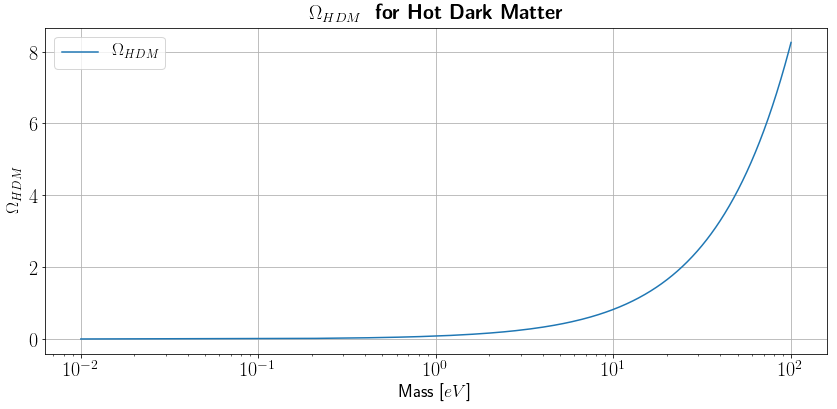

In [8]:
plt.figure(1,figsize=(14, 6))

plt.semilogx(mass,omega_hdm,label = r'$\Omega_{HDM}$')
plt.ylabel(r'$\Omega_{HDM}$ ',fontsize=18)
plt.xlabel(r'Mass [$eV$]',fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'$\Omega_{HDM}$ \textbf{ for Hot Dark Matter}',fontsize=20)
plt.grid(True)

plt.legend(prop=dict(size=18))
plt.show()

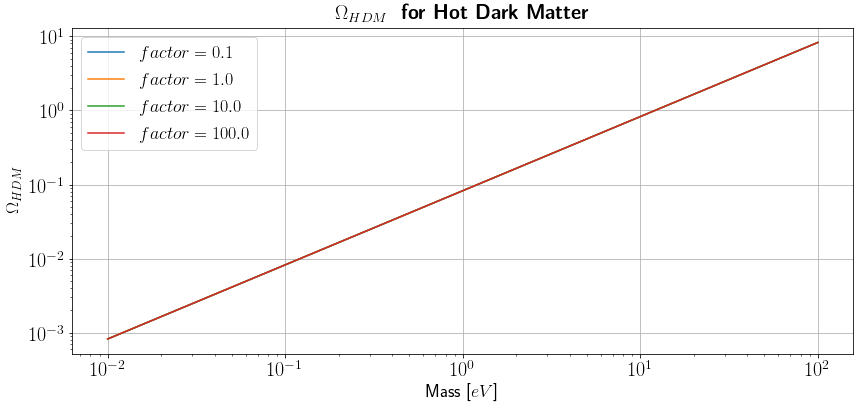

In [14]:
plt.figure(1,figsize=(14, 6))
factor = np.logspace(-1,2,4)
mass = np.linspace(1.0e-2,1.0e2,500)
for i in factor:
    T_fo = fo(g_dof,i*G_f)
    n_fo = nd_hdm(g_dof,T_fo)
    omega_hdm = abun(n_fo,mass)
    plt.loglog(mass,omega_hdm,label = r'$factor = %s $'%i)
plt.ylabel(r'$\Omega_{HDM}$ ',fontsize=18)
plt.xlabel(r'Mass [$eV$]',fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'$\Omega_{HDM}$ \textbf{ for Hot Dark Matter}',fontsize=20)
plt.grid(True)

plt.legend(prop=dict(size=18))
plt.show()

### Cold Dark Matter

The cold dark matter (CDM) case is very similar to the HDM case (see above), except that the particle density is now given by a different expression: 
$n_{CDM}(T) = g^\star\left( \frac{m T}{2 \pi} \right)^{3/2} e^{-m/T}$. 

Now solving the Hubble equation for $T_{fo}$ cannot be done analytically, so we solve it numerically. For a non relativistic particle we take $\frac{1}{3}c n(T) \sigma = \sqrt{\frac{8 \pi G}{3}}\rho^{1/2}$. Same as before, we take the radiation dominated energy density and model the cross section as $\sigma = G_F^2 T^2$. Now we will express $T_{fo}$ in terms of the dimensionless quantity $x \equiv \frac{m}{T}$. We expect $x$ to be linearly proportional to the mass $m$. We make a plot of this to cross check our results, which can be seen below.


Now that we have $T_{fo}$, we fill this into $n(T_{fo})$, redshift this to $n(T_0)$ and finally fill into $\Omega_{CDM} = \frac{m n(T_0)}{\rho_c}$.


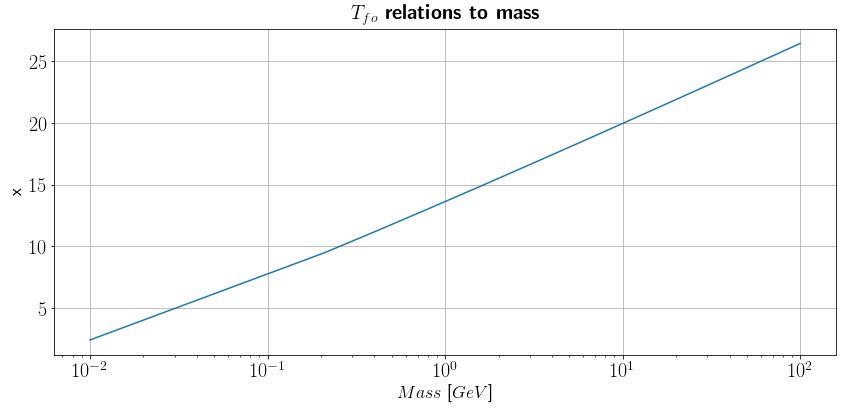

In [15]:
def func3(T,mass):
    func3 = np.sqrt(g_s_T0) * G_f**2  *np.exp(-mass/T) - np.sqrt(32*G/5)*(np.pi**3) *(mass*T)**(-3/2)
    return func3

def cal_Tcdm(mass):
    T_cdm = root(func3,T_fo,args = (mass))
    return T_cdm

x_l = []
for i in mass:
    j = i * GeV
    T_cdm = cal_Tcdm(j)
    x_l.append(j/T_cdm['x'])

plt.figure(1,figsize=(14, 6))
plt.semilogx(mass, x_l)
plt.xlabel(r'$Mass$ [$GeV$] ',fontsize=18)
plt.ylabel(r'x',fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'\textbf{ $T_{fo}$ relations to mass}',fontsize=20)
plt.grid(True)

# plt.legend(prop=dict(size=18))
plt.show()

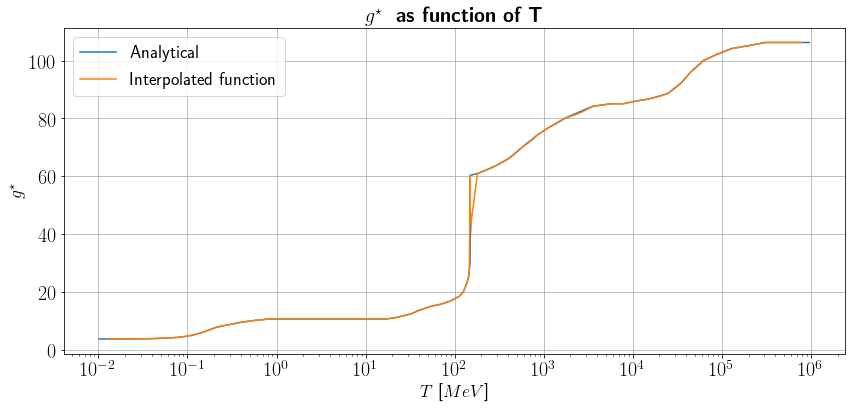

In [45]:
from numpy import genfromtxt
from scipy.interpolate import interp1d
my_data = genfromtxt('data.csv', delimiter=',')

x = my_data[:,0]
y = my_data[:,1]
g = interp1d(x,y)
T = np.logspace(-1.9,5.9,10e6)

plt.figure(1,figsize=(14, 6))
plt.semilogx(x,y,label = "Analytical")
plt.semilogx(T,g(T),label = 'Interpolated function')
plt.ylabel(r'$g^\star$',fontsize=18)
plt.xlabel(r'$T$ [$MeV$]',fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'$g^\star$ \textbf{ as function of T} ',fontsize=20)
plt.legend(prop=dict(size=18))
plt.grid(True)

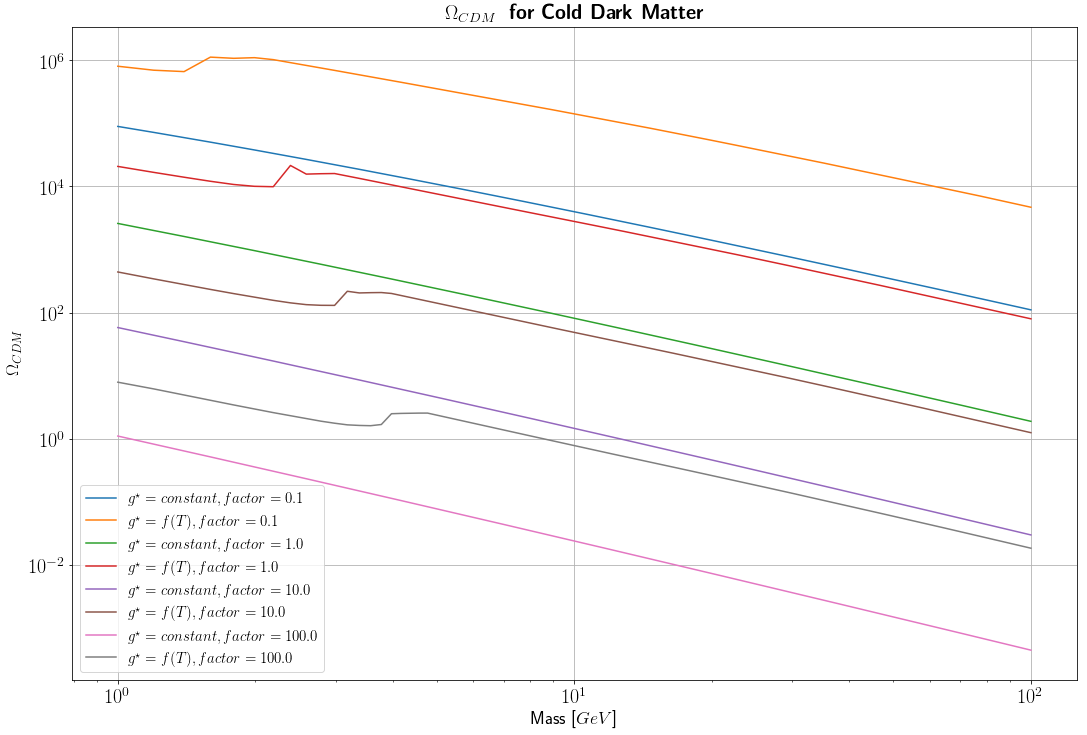

In [47]:
def func3(T,mass,G_f):
    func3 = np.sqrt(g_s_T0) * G_f**2  *np.exp(-mass/T) - np.sqrt(32*G/5)*(np.pi**3) *(mass*T)**(-3/2)
    return func3

def cal_Tcdm(mass,G_f):
    T_cdm = root(func3,T_fo,args = (mass,G_f))
    return T_cdm

def nd_cdm(m,T,g):
    n_cdm = g*(m*T/(2*np.pi))**(3/2) *np.exp(-m/T)
    return n_cdm

def ab_cdm(m,n,T_fo):
    n_0 = n*(g_s_T0 * T_CMB**3)/(g_s_Tfo * T_fo**3)
    return m*n_0/rho_c
plt.figure(1,figsize=(18, 12))
mass = np.linspace(1.0,1.0e2,500)
factor = np.logspace(-1,2,4)
for k in factor:
    omega_l = []
    omega_c = []
    for i in mass:
        j = i * GeV
        T_cdm = cal_Tcdm(j,k*G_f)['x'][0]
        n_cdm = nd_cdm(j,T_cdm,g_dof)
        omega_cdm = ab_cdm(j,n_cdm,T_cdm)
        omega_l.append(omega_cdm)

        n_cc = nd_cdm(j,T_cdm,g(T_cdm/MeV))
        omega_cc = ab_cdm(j,n_cc,T_cdm)
        omega_c.append(omega_cc)

    plt.loglog(mass, omega_l,label = '$g^\star = constant, factor = %s$' %k)
    plt.loglog(mass, omega_c,label = '$g^\star = f(T), factor = %s$' %k)

plt.xlabel(r'Mass [$GeV$]',fontsize=18)
plt.ylabel(r'$\Omega_{CDM}$',fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'$\Omega_{CDM}$ \textbf{ for Cold Dark Matter}',fontsize=20)
plt.grid(True)

plt.legend(prop=dict(size=15))
plt.show()

## Part 2: solving differential equations
We now have to solve the differential equation given in Steigman et al. %[Steigman, et al.](https://arxiv.org/pdf/1204.3622.pdf)

$\frac{dY}{dx}= \frac{s \left<\sigma v\right>}{Hx}\left(1+\frac{1}{3}\frac{d(\ln g_s^\star)}{d(\ln T)}\right)\left(Y^2_{eq} - Y^2 \right)$. 

We also know
$Y_{eq}=\frac{45}{2 \pi^4} \left(\frac{\pi}{8}\right)^{1/2} \frac{g_{\chi}}{g_s^\star} x^{3/2} e^{-x}$, $s=\frac{2 \pi^2}{45} g_s^\star \left(\frac{m}{x}\right)^3$, $H = \sqrt{\frac{ 8 \pi G }{3} \cdot \frac{\pi^2 \rho}{30}} \left(\frac{m}{x}\right)^2$ and $x \equiv \frac{m}{T}$. If we now rewrite the above equation in terms of $x$ and not $T$, we get the following expression:

$\frac{dY}{dx}= \left<\sigma v\right> \frac{2 \pi^2}{45} g_s^\star \frac{m}{x^2} \sqrt{\frac{90}{8 \pi^3 G g_s^\star}} \left(1-\frac{m}{3}\frac{d(\ln g_s^\star)}{d x}\right)\left( \left( \frac{45}{2 \pi^4} \cdot \frac{g_{\chi}}{g_s^\star}\right)^2 \frac{\pi}{8} x^3 e^{-2x} - Y^2 \right)$. We now have to solve this differential equation and plot $Y$ as a function of $T$.

In order to do this, we must first make several assumptions. The first assumption is that the relativistic degrees of freedom of the plasma, $g_s^\star (T)$, can be treated as a step function. We also assume $ \left< \sigma v \right>$ is given by the equipartition theorem.

We have extracted the values for $g_s^\star$ from Steigman, et al. and interpolated them to obtain a function for $g_s^\star$.